In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews_data_dictionary.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings_data_dictionary.csv


In [79]:
from IPython.core.display import HTML

HTML("""
<link href="https://fonts.googleapis.com/css2?family=Montserrat&display=swap" rel="stylesheet">
""")


<div style="background-color: #f88379; padding: 25px; border-radius: 10px; font-size: 20px; font-family: 'Montserrat', sans-serif;">
  <h1 style="color: #333;"><strong>AirBnB Listings and Reviews</strong></h1>
</div>


<div style="background-color: 	#f88379; padding: 25px; border-radius: 10px; font-size: 20px; font-family: 'Montserrat', sans-serif;">
  <h1 style="color: #333; margin: 0;"><strong>Exploratory Data Analysis</strong></h1>
</div>


In [27]:
reviews_dict = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews_data_dictionary.csv")

In [28]:
reviews_dict

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


In [29]:
reviews = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews.csv")

In [30]:
reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


In [31]:
listings_dict = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings_data_dictionary.csv")

In [32]:
listings_dict

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


<div style="background-color: #f88379; padding: 25px; border-radius: 10px; font-family: 'Montserrat', sans-serif;">
  <h1 style="color: #333; margin: 0;"><strong>Loading and Checking the Dataset</strong></h1>
</div>


In [33]:
listings = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv",
                       encoding = "ISO-8859-1",low_memory=False)

In [34]:
import warnings
warnings.filterwarnings("ignore")


In [35]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [36]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [37]:
listings["host_since"] = pd.to_datetime(listings["host_since"])

<div style="background-color: #f88379; padding: 25px; border-radius: 10px; font-family: 'Montserrat', sans-serif;">
  <h1 style="color: #333; margin: 0;"><strong>Information About the Dataset</strong></h1>
</div>


In [38]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [39]:
listings["city"].value_counts()

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: count, dtype: int64

<div style="background-color: #f88379; padding: 25px; border-radius: 10px; font-family: 'Montserrat', sans-serif;">
  <h1 style="color: #333; margin: 0;"><strong>Columns and Rows Filtering</strong></h1>
</div>


In [40]:
paris_listings = listings.query("city == 'Paris' ").loc[:,["host_since","neighbourhood","city","accommodates","price"]]

<div style="background-color: #f88379; padding: 25px; border-radius: 10px; font-family: 'Montserrat', sans-serif;">
  <h1 style="color: #333; margin: 0;"><strong>Paris City Data Analysis</strong></h1>
</div>


In [41]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [42]:
paris_listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


<div style="background-color: #f88379; padding: 25px; border-radius: 10px; font-family: 'Montserrat', sans-serif;">
  <h1 style="color: #333; margin: 0;"><strong>Checking if there are missing values in the dataset</strong></h1>
</div>


In [43]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [44]:
paris_listings.dropna(how = "any",inplace = True)

In [45]:
paris_listings.isna().sum()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

In [46]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64657 non-null  object        
 2   city           64657 non-null  object        
 3   accommodates   64657 non-null  int64         
 4   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [47]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64657.000000,64657.000000
mean,2015-11-01 11:06:05.528867584,3.037877,113.104614
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588382,214.479626


In [48]:
paris_listings.describe(include = "object")

,neighbourhood,city
count,64657,64657
unique,20,1
top,Buttes-Montmartre,Paris
freq,7232,64657


In [49]:
paris_listings[paris_listings["accommodates"] == 0].count(axis = 0)

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [50]:
paris_listings[paris_listings["price"] == 0].count(axis = 0)

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [51]:
paris_listings[(paris_listings["accommodates"] != 0) & (paris_listings["price"] == 0)]

,host_since,neighbourhood,city,accommodates,price
207075,2019-07-22,Vaugirard,Paris,2,0
207076,2019-10-31,Enclos-St-Laurent,Paris,2,0
208301,2019-05-27,Palais-Bourbon,Paris,2,0
208302,2019-07-19,Pantheon,Paris,3,0
208854,2016-09-16,Louvre,Paris,3,0
208855,2019-11-06,Luxembourg,Paris,3,0
208856,2019-12-02,Elysee,Paris,3,0
208857,2019-12-17,Opera,Paris,2,0


In [52]:
paris_listings = paris_listings[(paris_listings["price"] != 0)]


In [53]:
paris_listings

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [54]:
paris_listings[paris_listings["price"] == 0].count(axis = 0)

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

In [55]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64595 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64595 non-null  datetime64[ns]
 1   neighbourhood  64595 non-null  object        
 2   city           64595 non-null  object        
 3   accommodates   64595 non-null  int64         
 4   price          64595 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


<div style="background-color: #f88379; padding: 25px; border-radius: 10px; font-family: 'Montserrat', sans-serif;">
  <h1 style="color: #333; margin: 0;"><strong>Finding average Price of AirBnB in Paris as per Localities</strong></h1>
</div>


In [56]:
paris_listings_neighbourhood = paris_listings.groupby("neighbourhood").agg({"price" : "mean"}).sort_values("price",ascending = False)

In [57]:
paris_listings_neighbourhood

,price
neighbourhood,
Elysee,211.373651
Louvre,175.754448
Passy,161.290875
Palais-Bourbon,157.514464
Luxembourg,155.794589
Bourse,149.633577
Hotel-de-Ville,144.515228
Temple,138.429300
Pantheon,122.983599


In [58]:
paris_listings_accommodates = paris_listings.groupby("accommodates").agg({"price" : "mean"}).sort_values("price",ascending = False)

In [59]:
paris_listings_accommodates

,price
accommodates,
15,928.416667
12,821.434211
13,704.578947
14,699.230769
11,680.911765
16,677.060606
10,585.756219
9,381.900000
8,325.022440


In [60]:
Elysee_listings_accommodates = paris_listings.query("neighbourhood == 'Elysee'").groupby("accommodates").agg({"price" : "mean"}).sort_values("price",ascending = False)

In [61]:
Elysee_listings_accommodates

,price
accommodates,
14,971.000000
13,842.500000
11,805.000000
16,800.000000
12,529.625000
10,500.857143
9,440.272727
7,411.538462
8,405.518519


In [62]:
# INSIDE THE PARIS , THE PRICE OF AIRBNB IS DIRECTLY IMPACTED BT THE POPULARITY OF THE TOURIST PLACES OR
# THE VIEW OF EIFFEL TOWER . WE NEED TO FURTHER SEE IF THE PRICES ARE INCREASING WHEN THE REGULATION ARE IMPOSED  

In [63]:
# THE AIRBNB WITH 14 PEOPLE ACCOMMODATES IS THE EXPENSIVE , EVEN MORE EXPENSIVE THE 16 ACCOMMODATES
# THE SAME TREND IS SPOTTED FOR 11 AND 12 ACCOMMODATES .EVERY OTHER ACCOMMODATION LOOKS REASONABLE

<div style="font-family: 'Montserrat', sans-serif; font-size: 16px; color: #000; background-color: #00A699; padding: 15px;">
   <p><strong>Possible Reasons for This Trend</strong></p>

   <p>1. Properties accommodating 16 people may experience lower occupancy rates due to the limited number of large groups that typically seek such accommodations.</p>

   <p>2. Properties with a capacity of 14 people may represent an ideal choice for families traveling together, offering a balanced and comfortable space for two families.</p>

   <p>3. It is possible that properties accommodating more than 16 people or fewer than 12 are located farther away from key attractions and hotspots in Elysee, affecting their occupancy rates.</p>

   <p>4. Potential outliers in properties with capacities of 11 and 14 people may be skewing the observed trend, leading to irregularities in occupancy data.</p>
</div>


In [64]:
paris_listings["host_since"].nunique()

3854

<div style="background-color: #f88379; padding: 25px; border-radius: 10px; font-family: 'Montserrat', sans-serif;">
  <h1 style="color: #333; margin: 0;"><strong>Finding popularity of AirBnB over time</strong></h1>
</div>


In [65]:
paris_listings_over_time = paris_listings.set_index("host_since").resample("y").agg({"neighbourhood": "count","price":"mean"})

In [66]:
paris_listings_over_time


,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8867,114.211345


In [67]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [68]:
paris_listings_neighbourhood

,price
neighbourhood,
Elysee,211.373651
Louvre,175.754448
Passy,161.290875
Palais-Bourbon,157.514464
Luxembourg,155.794589
Bourse,149.633577
Hotel-de-Ville,144.515228
Temple,138.429300
Pantheon,122.983599


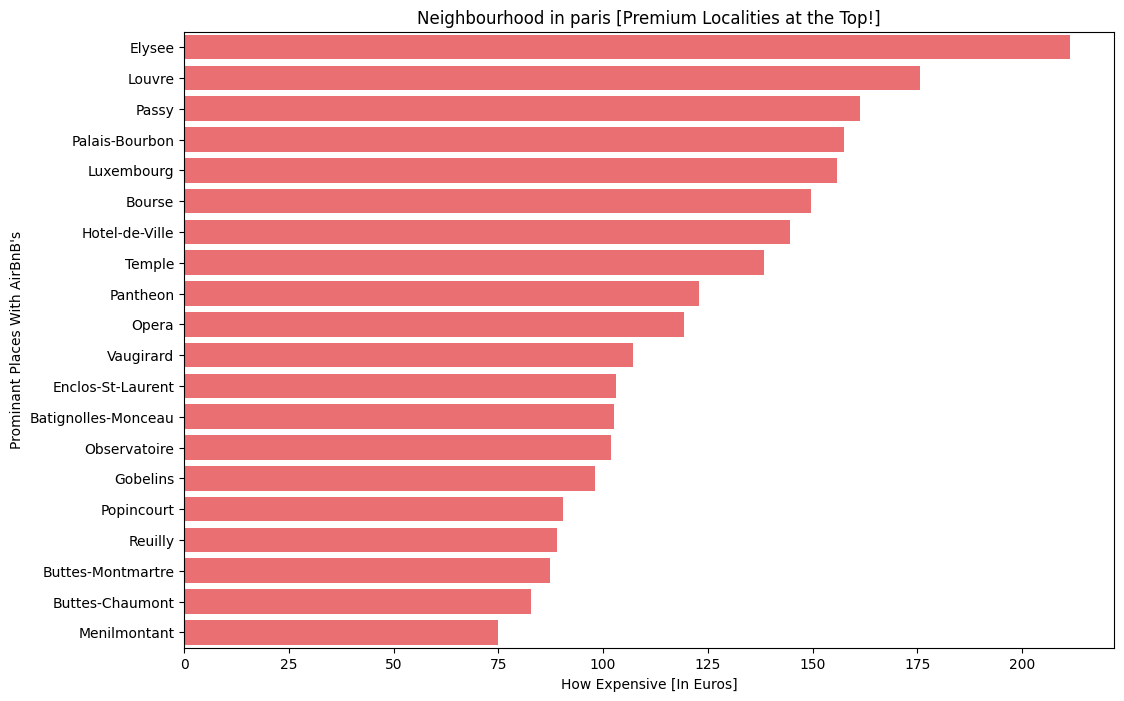

In [69]:
plt.figure(figsize = (12,8))
sns.barplot(data = paris_listings_neighbourhood,
            x = "price",
            y = paris_listings_neighbourhood.index,
            color = "#FF5A5F")
plt.title("Neighbourhood in paris [Premium Localities at the Top!]")
plt.xlabel("How Expensive [In Euros]")
plt.ylabel("Prominant Places With AirBnB's")
plt.show()

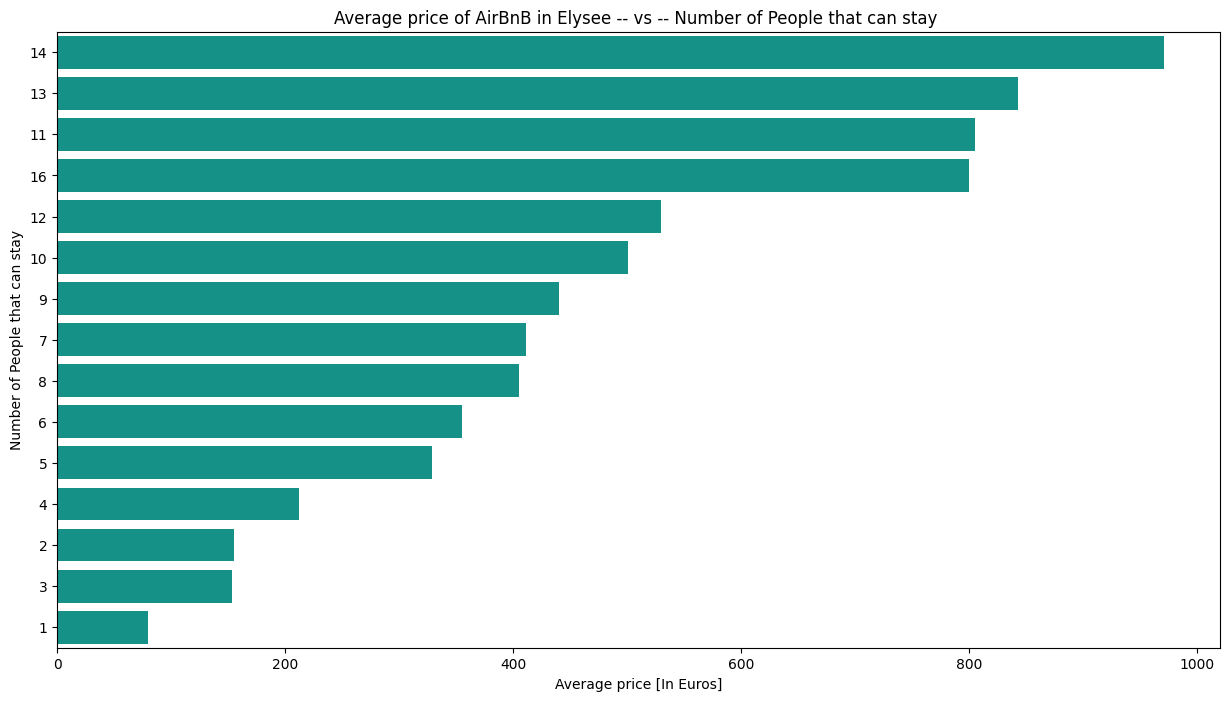

In [70]:
plt.figure(figsize = (15,8))
sns.barplot(data = Elysee_listings_accommodates,
            x = "price",
            y = Elysee_listings_accommodates.index,
            color = "#00A699",
            orient = "h",
            order = Elysee_listings_accommodates.index )
plt.title("Average price of AirBnB in Elysee -- vs -- Number of People that can stay ")
plt.xlabel("Average price [In Euros]")
plt.ylabel("Number of People that can stay")
plt.show()

In [71]:
paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8867,114.211345


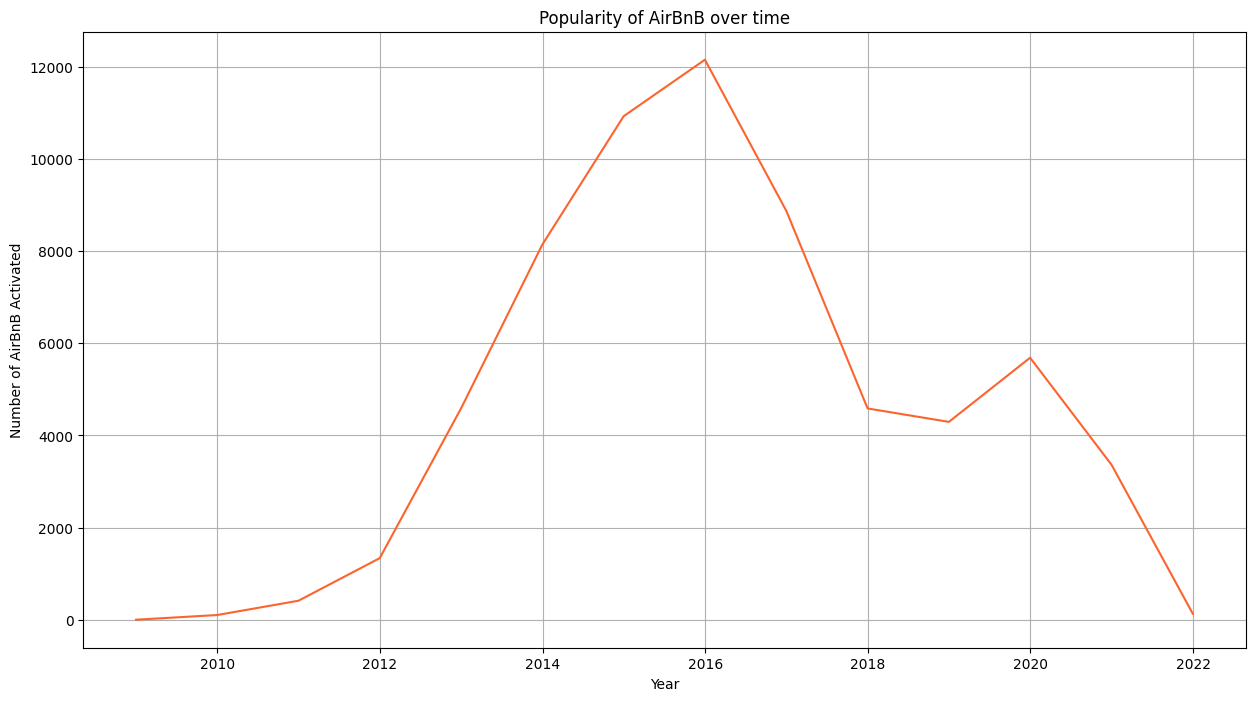

In [72]:
plt.figure(figsize = (15,8))
sns.lineplot(data = paris_listings_over_time["neighbourhood"],
             color = "#FC642D")
plt.title("Popularity of AirBnB over time")
plt.xlabel("Year")
plt.ylabel("Number of AirBnB Activated")
plt.grid()
plt.show()

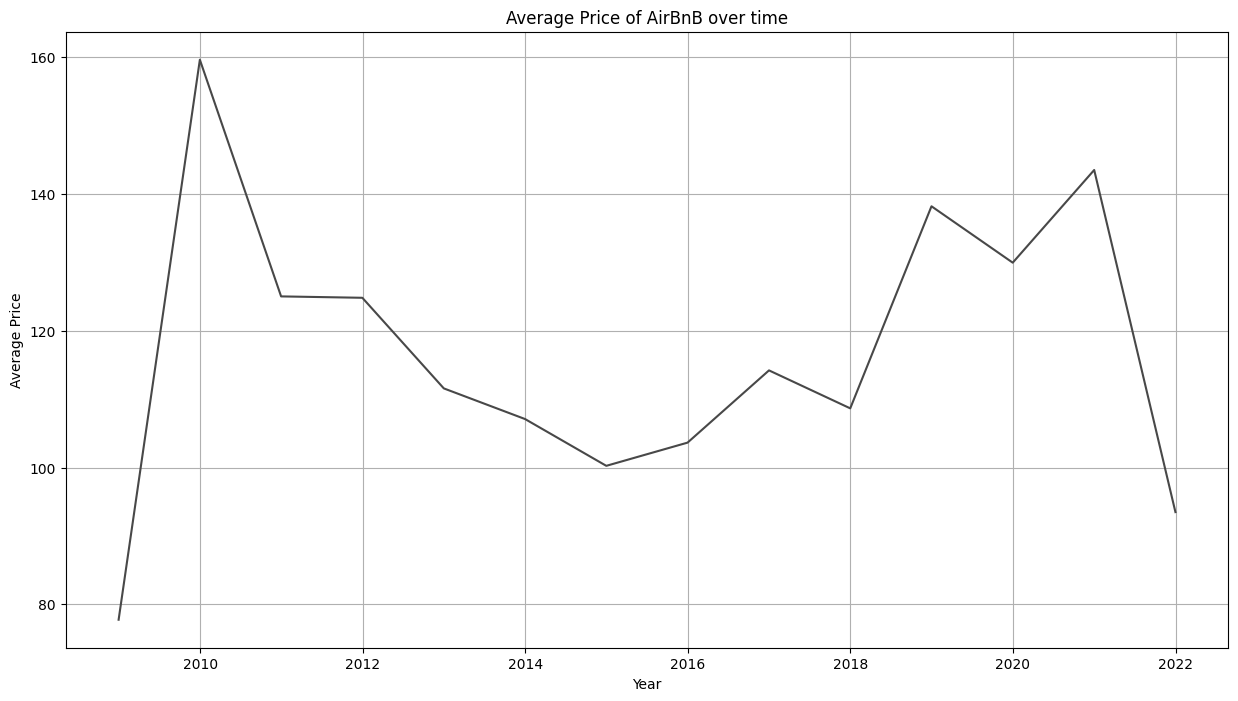

In [73]:
plt.figure(figsize = (15,8))
sns.lineplot(data = paris_listings_over_time["price"],
             color = "#484848")
plt.title("Average Price of AirBnB over time")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid()
plt.show()

<div style="background-color: #f88379; padding: 25px; border-radius: 10px; font-family: 'Montserrat', sans-serif;">
  <h1 style="color: #333; margin: 0;"><strong>Finding effects of Regulations on AirBnB Business</strong></h1>
</div>


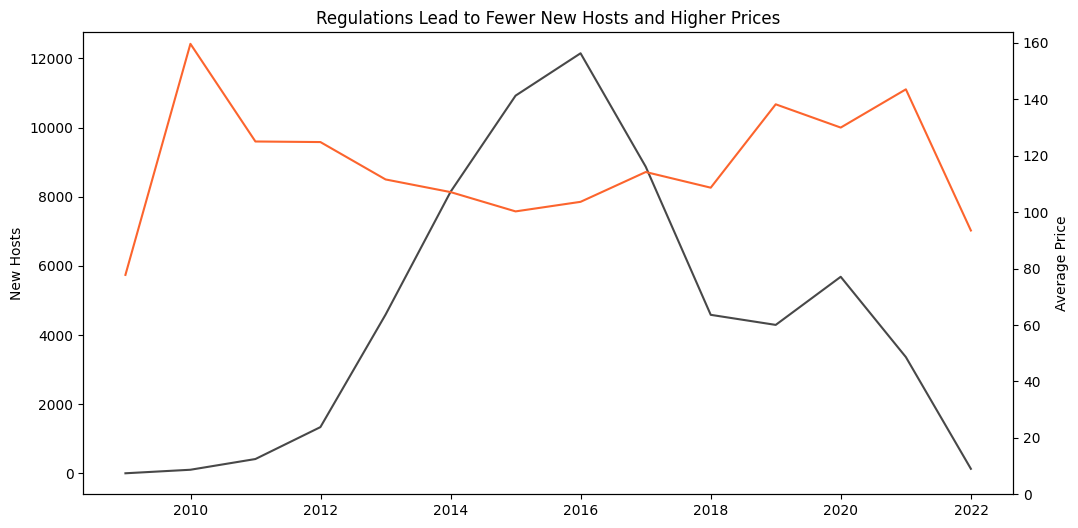

In [74]:
fig , ax = plt.subplots(figsize=(12, 6))

ax.plot(paris_listings_over_time.index,paris_listings_over_time["neighbourhood"], label = "New Hosts", c = "#484848")

ax.set_ylabel("New Hosts")

ax2 = ax.twinx() #twin axis 

ax2.plot(paris_listings_over_time.index,paris_listings_over_time["price"], label = "Average Price", c = "#FC642D")

ax2.set_ylim(0)

ax2.set_ylabel("Average Price")

ax.set_title("Regulations Lead to Fewer New Hosts and Higher Prices")

plt.show()

<div style="background-color: #f88379; padding: 25px; border-radius: 10px; font-family: 'Montserrat', sans-serif;">
  <h1 style="color: #333; margin: 0;"><strong>Final Insights</strong></h1>
</div>


<div style="font-family: 'Montserrat', sans-serif; font-size: 16px; color: #000; background-color: #00A699; padding: 15px;">
   <p><strong>Possible Reasons for This Trend</strong></p>

   <p>1. The number of AirBnBs kept on increasing since the launch and prices kept on increasing too, due to initial traction and early adopters.</p>

   <p>2. After the startup became known to everyone and became a common utility, AirBnBs started increasing in numbers and prices also kept on decreasing.</p>

   <p>3. After regulation was announced around 2015, there was a lack of confidence in the business, causing the number of AirBnBs to decrease while prices started increasing.</p>

   <p>4. Once the regulation became the new normal, during the year 2019, the number of AirBnBs increased in number, and prices kept decreasing due to the increased supply.</p>
</div>


<div style="background-color: #f88379; padding: 25px; border-radius: 10px; font-family: 'Montserrat', sans-serif;">
  <h1 style="color: #333; margin: 0;"><strong>Recommendation for AirBnB</strong></h1>
</div>


<div style="font-family: 'Montserrat', sans-serif; font-size: 16px; color: #000; background-color: #00A699; padding: 15px;">
   <p><strong>Impact of Regulations on AirBnB Business</strong></p>

   <p>1. The implementation of regulations in long-term rentals may negatively affect the business, leading to potential churn among both customers and hosts due to the uncertainty surrounding the regulatory landscape.</p>

   <p>2. Such regulations could contribute to financial losses for AirBnB, with long-term recovery potentially becoming challenging and requiring significant time and resources.</p>

   <p>3. If customer experience is compromised by the new regulatory environment, it may result in a skewed or unfavorable brand perception, ultimately affecting the company’s reputation.</p>

   <p>4. It is advisable to closely monitor regulatory developments in other regions and proactively prepare for any similar changes that may occur in AirBnB’s operating markets.</p>

   <p>5. AirBnB may consider implementing similar regulations in other locations to maintain consistency in its business model and ensure uniformity across markets.</p>

   <p>6. The company could enforce stringent criteria for onboarding and offboarding hosts, ensuring that only those meeting specific standards are allowed to participate, thereby maintaining the integrity of the platform.</p>

   <p>7. Limiting the number of listings in specific localities could help balance demand and supply, ensuring adequate rental options for the public while reducing the risk of governmental intervention.</p>
</div>
